<a href="https://colab.research.google.com/github/2021-FIIT-Bc-projects/BP-Eliseeva-Najdiskutovanejsie_temy_v_dokumentoch/blob/main/Bakalarka_NIPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim
import nltk
import pandas as pd
import numpy as np
import re
import collections
import itertools

from gensim import corpora
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud
from nltk.corpus import stopwords
from pprint import pprint
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
import spacy

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
# stop_words.extend(['bhjn', 'a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', 'cant', 'co', 'com', 'come', 'comes', 'could', 'couldnt', 'd', 'date', 'did', 'didnt', 'different', 'do', 'does', 'doesnt', 'doing', 'done', 'dont', 'down', 'downwards', 'due', 'during', 'e', 'each', 'ed', 'edu', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'fix', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives', 'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', 'hasnt', 'have', 'havent', 'having', 'he', 'hed', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how', 'howbeit', 'however', 'hundred', 'i', 'id', 'ie', 'if', 'im', 'immediate', 'in', 'inc', 'indeed', 'index', 'instead', 'into', 'invention', 'inward', 'is', 'isnt', 'it', 'itd', 'itll', 'its', 'itself', 'j', 'just', 'k', 'keep',	'keeps', 'kept', 'kg', 'km', 'know', 'known', 'knows', 'l', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked', 'likely', 'line', 'little', 'll', 'look', 'looking', 'looks', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime', 'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'mug', 'must', 'my', 'myself', 'n', 'na', 'name', 'namely', 'nay', 'nd', 'near', 'nearly', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'nor', 'nos', 'not', 'nothing', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'overall', 'owing', 'own', 'p', 'page', 'pages', 'part', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'pp', 'predominantly', 'previously', 'probably', 'promptly', 'put', 'q', 'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'right', 'run', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 'shall', 'she', 'shed', 'shell', 'shes', 'should', 'shouldnt', 'show', 'showed', 'shown', 'showns', 'shows', 'since', 'six', 'slightly', 'so', 'some', 'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'still', 'stop', 'strongly', 'sub', 'such', 'sufficiently', 'suggest', 'sup', 'sure	t', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', 'thatll', 'thats', 'thatve', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore', 'therein', 'therell', 'thereof', 'therere', 'theres', 'thereto', 'thereupon', 'thereve', 'these', 'they', 'theyd', 'theyll', 'theyre', 'theyve', 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through', 'throughout', 'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'try', 'trying', 'ts', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using', 'usually', 'v', 'value', 've', 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'w', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'well', 'went', 'were', 'werent', 'weve', 'what', 'whatever', 'whatll', 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', 'wholl', 'whom', 'whomever', 'whos', 'whose', 'why', 'widely', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'would', 'wouldnt', 'www', 'x', 'y', 'yes', 'yet', 'you', 'youd', 'youll', 'your', 'youre', 'yours', 'yourself', 'yourselves', 'youve', 'z', 'zero'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def ShowWordCloud(data):
    string = ','.join(str(text) for text in data)
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, max_font_size=60, regexp=r"\w[\w']+\w").generate(string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)


def remove_stopwords_spacy(texts):
  filtered_texts = []
  for text in texts:
    filtered_sentence = [] 
    for word in text:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    filtered_texts.append(filtered_sentence)
  return filtered_texts

def remove_stopwords_nltk(texts):
  return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def twenty_newsgroup_to_list():
    newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
    data = {'texts': newsgroups_train.data, 'topic_names': newsgroups_train['target_names'], 'topics_assigned': newsgroups_train['target']}
    return data

In [ ]:
papers = pd.read_csv('drive/MyDrive/Colab Notebooks/papers_1000.csv')
papers = papers.drop(columns=['id', 'event_type', 'pdf_name', 'year', 'abstract'], axis=1)

papers['paper_text_processed'] = papers['paper_text'].str.replace('[ \t\n\r\f\v]', " ")
papers['paper_text_processed'] = papers['paper_text_processed'].str.replace(r"\S*@\S*\s?", "")
papers['paper_text_processed'] = papers['paper_text_processed'].str.lower()
data_words = list(sent_to_words(papers['paper_text_processed'].values))

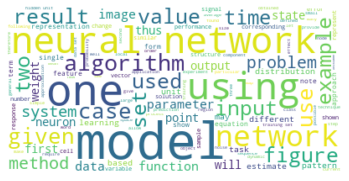

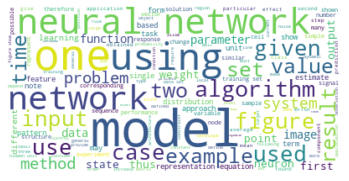

In [ ]:
ShowWordCloud(data_words)
data_words_nostops = remove_stopwords_nltk(data_words)
ShowWordCloud(data_words_nostops)
# data_words_nostops = remove_stopwords_spacy(data_words)
# ShowWordCloud(data_words_nostops)

In [ ]:
bigram = gensim.models.Phrases(data_words_nostops, threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
data_bigrams = [bigram_mod[text] for text in data_words_nostops]

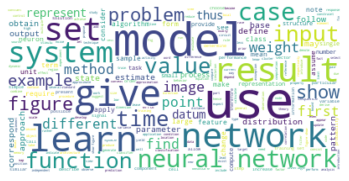

In [ ]:
data_lemmatized = []
for text in data_bigrams:
    doc = nlp(" ".join(text))
    data_lemmatized.append([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']])
ShowWordCloud(data_lemmatized)

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)

print(len(id2word))
# id2word.filter_extremes(no_above=0.5, no_below=5)
# print(len(id2word))

corpus = [id2word.doc2bow(text) for text in data_lemmatized]

27255


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=13, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
pprint(lda_model.print_topics())
#perplexity
print(lda_model.log_perplexity(corpus))
#coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
print(coherence_model_lda.get_coherence())

[(0,
  '0.031*"image" + 0.014*"visual" + 0.012*"use" + 0.012*"object" + '
  '0.010*"figure" + 0.008*"representation" + 0.008*"model" + 0.007*"show" + '
  '0.007*"feature" + 0.007*"system"'),
 (1,
  '0.022*"neuron" + 0.020*"model" + 0.019*"cell" + 0.013*"input" + '
  '0.013*"response" + 0.011*"time" + 0.011*"stimulus" + 0.009*"activity" + '
  '0.009*"show" + 0.008*"pattern"'),
 (2,
  '0.042*"expert" + 0.020*"ensemble" + 0.015*"prediction" + 0.013*"subscriber" '
  '+ 0.012*"return" + 0.010*"committee" + 0.009*"cost" + 0.009*"predictor" + '
  '0.008*"risk" + 0.008*"year"'),
 (3,
  '0.027*"circuit" + 0.019*"voltage" + 0.018*"current" + 0.018*"chip" + '
  '0.017*"output" + 0.015*"use" + 0.012*"input" + 0.012*"figure" + '
  '0.010*"show" + 0.009*"analog"'),
 (4,
  '0.016*"use" + 0.014*"noise" + 0.013*"function" + 0.013*"datum" + '
  '0.013*"distribution" + 0.011*"estimate" + 0.009*"gaussian" + 0.009*"kernel" '
  '+ 0.009*"source" + 0.009*"method"'),
 (5,
  '0.024*"image" + 0.021*"point" + 0.